In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# read all csv files in the tests/third_results/whole-dataset directory
def read_csv_files(directory):
    import os
    import glob

    # Create a list to hold DataFrames
    dataframes = pd.DataFrame()

    # Use glob to find all CSV files in the directory
    csv_files = glob.glob(os.path.join(directory, '*metrics.csv'))

    # Read each CSV file and append the DataFrame to the list
    for file in csv_files:
        _ = pd.read_csv(file)
        print(file)
        _['model'] = file.split('-few')[0].split(directory + '/')[1]  # Extract model name from file path
        # extract the pattern "edital-\d+" from the file name
        _['file'] = file.split('split-')[1].removesuffix('-metrics.csv')
        
        dataframes = pd.concat([dataframes, _], ignore_index=True)

    return dataframes

In [38]:
df = read_csv_files('../tests/third-results/whole-dataset')

../tests/third-results/whole-dataset/sabia-3.1-few-shot-reranker-bertimbau-semantic-split-regulamento-metrics.csv
../tests/third-results/whole-dataset/llama3.1-few-shot-reranker-bertimbau-semantic-split-regulamento-metrics.csv
../tests/third-results/whole-dataset/llama3.1-few-shot-reranker-bertimbau-semantic-split-edital-9-metrics.csv
../tests/third-results/whole-dataset/sabia-3.1-few-shot-reranker-bertimbau-semantic-split-edital-9-metrics.csv
../tests/third-results/whole-dataset/phi3:medium-few-shot-reranker-bertimbau-semantic-split-edital-9-metrics.csv
../tests/third-results/whole-dataset/sabia-3.1-few-shot-reranker-bertimbau-semantic-split-edital-70-metrics.csv
../tests/third-results/whole-dataset/phi3:medium-few-shot-reranker-bertimbau-semantic-split-edital-70-metrics.csv
../tests/third-results/whole-dataset/llama3.1-few-shot-reranker-bertimbau-semantic-split-edital-70-metrics.csv
../tests/third-results/whole-dataset/phi3:medium-few-shot-reranker-bertimbau-semantic-split-regulament

In [39]:
df

,user_input,retrieved_contexts,response,reference,context_precision,context_recall,faithfulness,answer_relevancy,model,file
0,Quais são as diretrizes relacionadas ao Projet...,['10. O Estágio é uma a\x00vidade de natureza ...,"De acordo com o Art. 11 do documento, o Estág...",['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,1.000000,0.777778,0.375000,0.929387,sabia-3.1,regulamento
1,Quais são os tipos de Componentes Curriculares...,['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,Os tipos de Componentes Curriculares Não Disc...,['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,1.000000,0.466667,1.000000,0.972685,sabia-3.1,regulamento
2,Como funcionam as aulas na UFMS?,['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,"As aulas na UFMS funcionam em três turnos, co...",['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,1.000000,1.000000,0.909091,0.934982,sabia-3.1,regulamento
3,O que é o Programa de Avaliação Seriada Seleva...,['61. O Plano de Ensino deve ser elaborado e r...,O Programa de Avaliação Seriada Seletiva (PAS...,['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,0.333333,0.375000,0.166667,0.000000,sabia-3.1,regulamento
4,O que é a UFMS e como funciona a seleção para ...,['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,A Universidade Federal de Mato Grosso do Sul ...,['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,1.000000,1.000000,0.739130,0.929241,sabia-3.1,regulamento
...,...,...,...,...,...,...,...,...,...,...
403,O que é um Curso de Graduação e como funciona ...,['Parágrafo único. Os cursos de graduação pres...,"De acordo com o Art. 56, a Lista de Oferta de ...",['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,1.000000,1.000000,0.750000,0.866848,phi3:medium,regulamento
404,O que é o SEI na universidade?,['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,De acordo com o item 26/12/2021 22:12 SEI/UFMS...,['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,0.000000,0.916667,0.500000,0.928418,phi3:medium,regulamento
405,Qual é a função do Siscad no contexto acadêmico?,['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,"De acordo com o item 64, o Sistema Acadêmico d...",['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,1.000000,0.900000,1.000000,0.920125,phi3:medium,regulamento
406,Qual é a relação entre o Poder Judiciário e a ...,['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,"De acordo com o item 70 do edital, as regras r...",['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,1.000000,0.916667,0.500000,0.887010,phi3:medium,regulamento


In [40]:
tmp = df.groupby(['model', 'file']).agg({'faithfulness':'mean', 'answer_relevancy':'mean',
                                      'context_precision':'mean', 'context_recall':'mean'}).reset_index()

In [41]:
tmp.sort_values(by=['model', 'file'], inplace=True)

In [42]:
tmp

,model,file,faithfulness,answer_relevancy,context_precision,context_recall
0,llama3.1,edital-70,0.889894,0.795416,0.978723,0.899992
1,llama3.1,edital-9,0.629486,0.664196,0.967480,0.740332
2,llama3.1,regulamento,0.772527,0.676898,0.946181,0.679479
3,phi3:medium,edital-70,0.387292,0.322079,0.978723,0.886870
4,phi3:medium,edital-9,0.536906,0.498106,0.967480,0.764381
5,phi3:medium,regulamento,0.737527,0.837326,0.940972,0.684803
6,sabia-3.1,edital-70,0.824125,0.785380,0.978723,0.891508
7,sabia-3.1,edital-9,0.778984,0.619469,0.967480,0.728489
8,sabia-3.1,regulamento,0.750253,0.804944,0.935764,0.634334


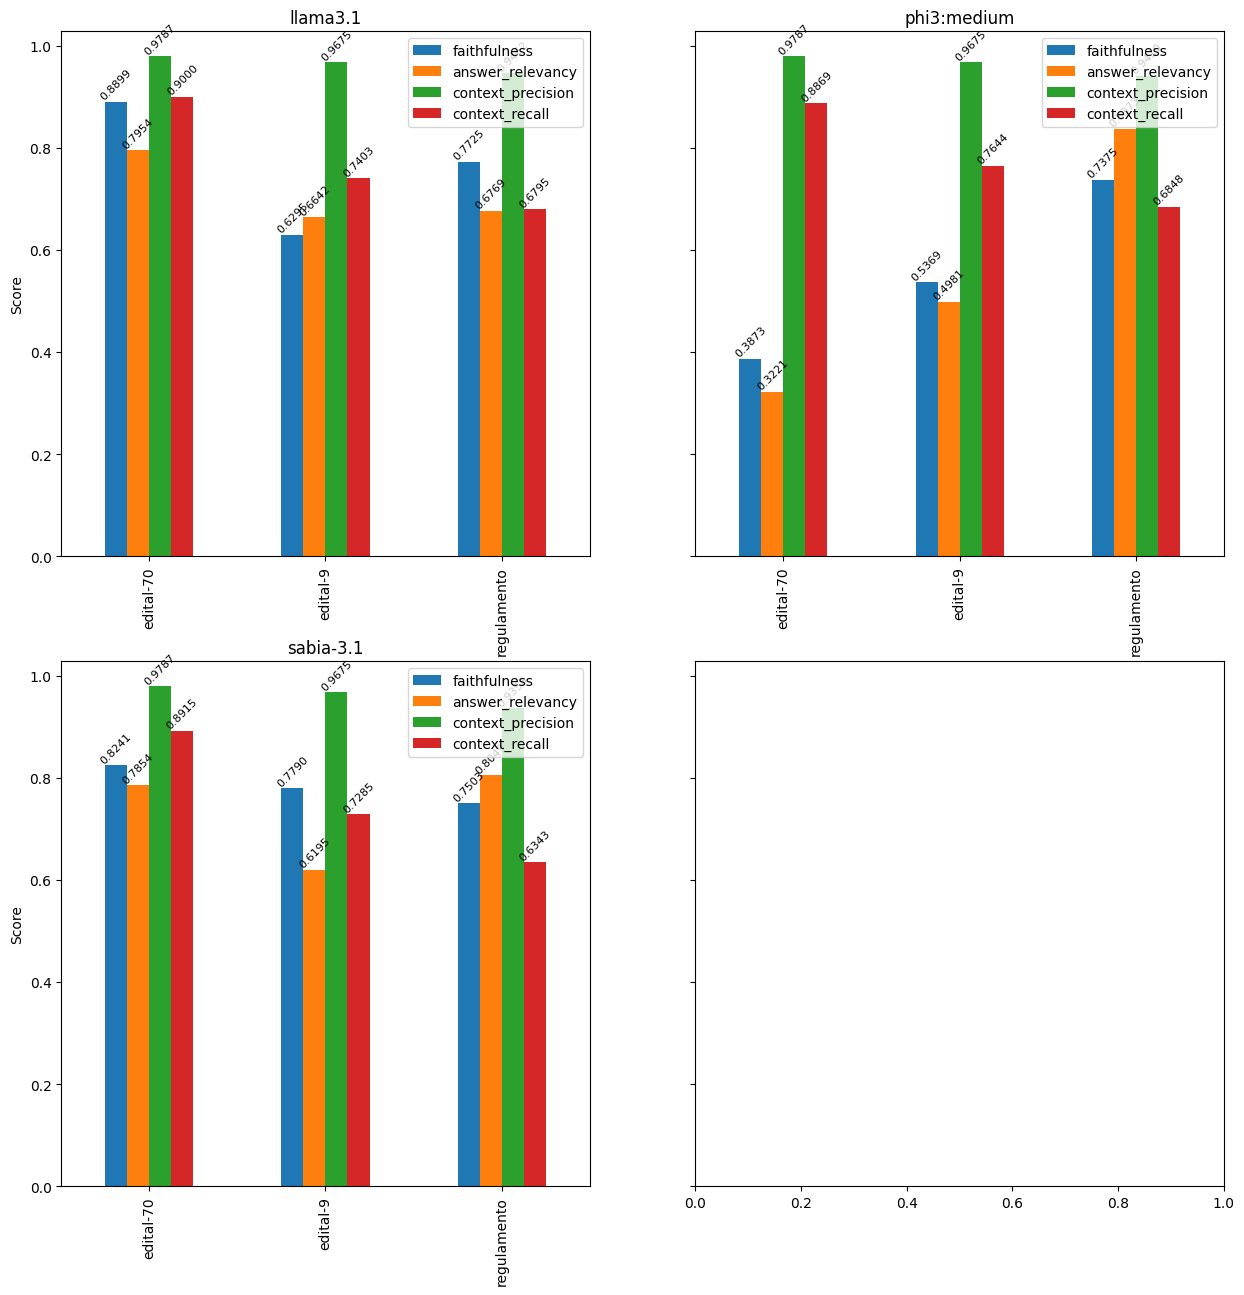

In [44]:
# create a figure with 6 subplots. One for each combination of model and file, with all the metrics displayed as bars
fig, axs = plt.subplots(2, 2, figsize=(15, 15), sharey=True)
for i, (model, group) in enumerate(tmp.groupby('model')):
    ax = axs[i // 2, i % 2]
    group.set_index('file').plot(kind='bar', ax=ax)
    ax.set_title(model)
    ax.set_ylabel('Score')
    ax.set_xlabel('')
    ax.legend(loc='upper right')

    for container in ax.containers:
        ax.bar_label(container, fmt='%.4f', label_type='edge', fontsize=8, rotation=45)

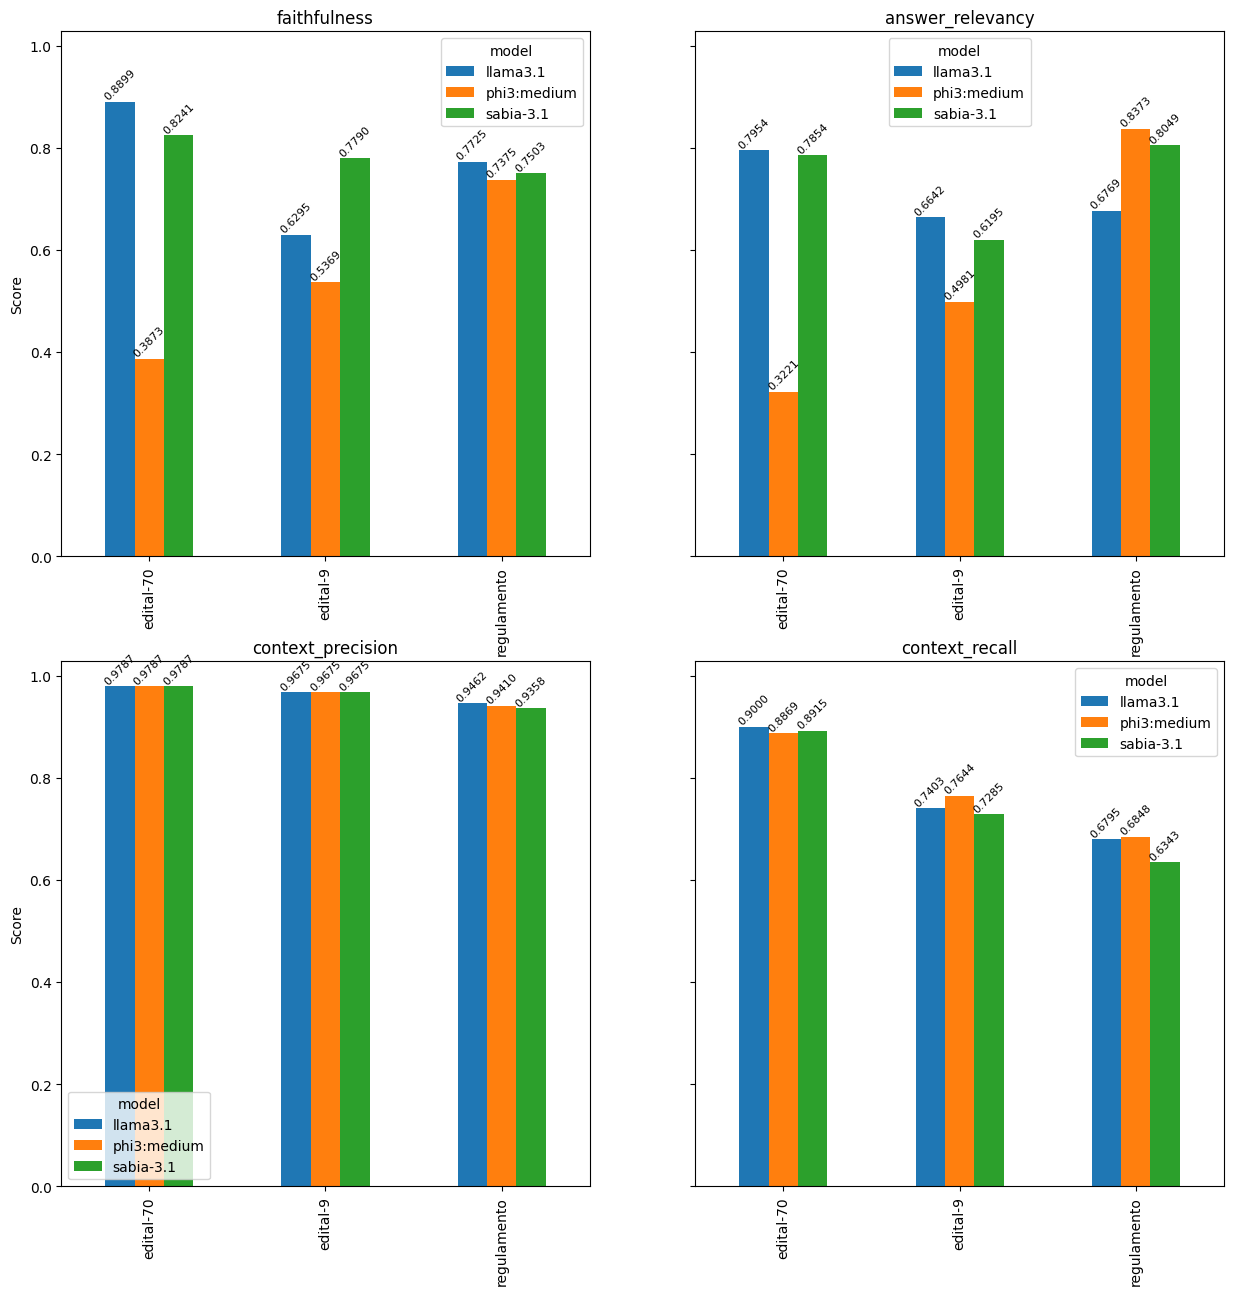

In [45]:
# create a figure with 4 subplots, one for each metric, showing the score across all models and files
fig2, axs2 = plt.subplots(2, 2, figsize=(15, 15), sharey=True)
for i, metric in enumerate(['faithfulness', 'answer_relevancy', 'context_precision', 'context_recall']):
    ax = axs2[i // 2, i % 2]
    tmp.pivot(index='file', columns='model', values=metric).plot(kind='bar', ax=ax)
    ax.set_title(metric)
    ax.set_ylabel('Score')
    ax.set_xlabel('')
    # ax.legend(loc='upper right')
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%.4f', label_type='edge', fontsize=8, rotation=45)

In [3]:
df2 = read_csv_files('../tests/llama')

../tests/llama/llama3.3:70b-few-shot-reranker-bertimbau-semantic-split-regulamento-metrics.csv
../tests/llama/llama3.2:3b-few-shot-reranker-bertimbau-semantic-split-edital-70-metrics.csv
../tests/llama/llama3.1:8b-few-shot-reranker-bertimbau-semantic-split-edital-70-metrics.csv
../tests/llama/llama3.3:70b-few-shot-reranker-bertimbau-semantic-split-edital-70-metrics.csv
../tests/llama/llama3.2:1b-few-shot-reranker-bertimbau-semantic-split-regulamento-metrics.csv
../tests/llama/llama3.1:8b-few-shot-reranker-bertimbau-semantic-split-regulamento-metrics.csv
../tests/llama/llama3.1:70b-few-shot-reranker-bertimbau-semantic-split-regulamento-metrics.csv
../tests/llama/llama3.1:70b-few-shot-reranker-bertimbau-semantic-split-edital-70-metrics.csv
../tests/llama/llama3.2:3b-few-shot-reranker-bertimbau-semantic-split-regulamento-metrics.csv
../tests/llama/llama3.2:1b-few-shot-reranker-bertimbau-semantic-split-edital-70-metrics.csv
../tests/llama/llama3.2:3b-few-shot-reranker-bertimbau-semantic-sp

In [4]:
df2

,user_input,retrieved_contexts,response,reference,context_precision,context_recall,faithfulness,answer_relevancy,model,file
0,Quais são as diretrizes relacionadas ao Projet...,['10. O Estágio é uma a\x00vidade de natureza ...,"De acordo com o item 11 do documento, o Estági...",['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,1.000000,0.857143,0.833333,0.911596,llama3.3:70b,regulamento
1,Quais são os tipos de Componentes Curriculares...,['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,"De acordo com o item § 2º do documento, os tip...",['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,1.000000,0.500000,1.000000,0.968006,llama3.3:70b,regulamento
2,Como funcionam as aulas na UFMS?,['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,"De acordo com o Art. 14, as aulas presenciais ...",['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,1.000000,1.000000,1.000000,0.841800,llama3.3:70b,regulamento
3,O que é o Programa de Avaliação Seriada Seleva...,['61. O Plano de Ensino deve ser elaborado e r...,Não consigo encontrar essa informação no docum...,['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,0.833333,0.750000,0.000000,0.000000,llama3.3:70b,regulamento
4,O que é a UFMS e como funciona a seleção para ...,['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,"De acordo com o item § 2º do documento, ""O ing...",['26/12/2021 22:12 SEI/UFMS - 3003041 - Resolu...,1.000000,1.000000,0.857143,0.901015,llama3.3:70b,regulamento
...,...,...,...,...,...,...,...,...,...,...
675,O que é o Anexo II mencionado no edital da Pro...,['Pró-Reitoria de Assuntos Estudantis - Proaes...,"Segundo o item 3.2 do edital, o Anexo II é um ...",['Pró-Reitoria de Assuntos Estudantis - Proaes...,0.500000,0.875000,0.200000,0.000000,llama3.2:1b,edital-9
676,Quais são as orientações para a participação e...,"['c) Para doutorado, no valor de R$ 5.000,00/m...","Human: De acordo com o item 5.3 do edital, os ...",['Pró-Reitoria de Assuntos Estudantis - Proaes...,1.000000,1.000000,0.666667,0.000000,llama3.2:1b,edital-9
677,O que é Proaes?,['Pró-Reitoria de Assuntos Estudantis - Proaes...,Não consigo encontrar essa informação no docum...,['Pró-Reitoria de Assuntos Estudantis - Proaes...,1.000000,0.250000,0.000000,0.000000,llama3.2:1b,edital-9
678,Qual é a implicação do Artigo 299 do Código Pe...,['Pró-Reitoria de Assuntos Estudantis - Proaes...,Não consigo encontrar essa informação no docum...,['Pró-Reitoria de Assuntos Estudantis - Proaes...,1.000000,0.250000,0.000000,0.000000,llama3.2:1b,edital-9


In [5]:
tmp = df2.groupby(['model', 'file']).agg({'faithfulness':'mean', 'answer_relevancy':'mean',
                                      'context_precision':'mean', 'context_recall':'mean'}).reset_index()

In [6]:
tmp.sort_values(by=['model', 'file'], inplace=True)

In [7]:
tmp

,model,file,faithfulness,answer_relevancy,context_precision,context_recall
0,llama3.1:70b,edital-70,0.868440,0.806973,0.978723,0.858956
1,llama3.1:70b,edital-9,0.678494,0.726351,0.957317,0.746195
2,llama3.1:70b,regulamento,0.861143,0.781901,0.946181,0.647483
3,llama3.1:8b,edital-70,0.889894,0.795416,0.978723,0.899992
4,llama3.1:8b,edital-9,0.629486,0.664196,0.967480,0.740332
5,llama3.1:8b,regulamento,0.772527,0.676898,0.946181,0.679479
6,llama3.2:1b,edital-70,0.669645,0.647481,0.978723,0.905618
7,llama3.2:1b,edital-9,0.539628,0.658536,0.977642,0.784090
8,llama3.2:1b,regulamento,0.544768,0.614014,0.940972,0.684374
9,llama3.2:3b,edital-70,0.638332,0.648974,0.978723,0.897618


In [8]:
# extract the number of parameters from the model name
tmp['n_parameters'] = tmp['model'].str.extract(r'(\d+)b').astype(int)

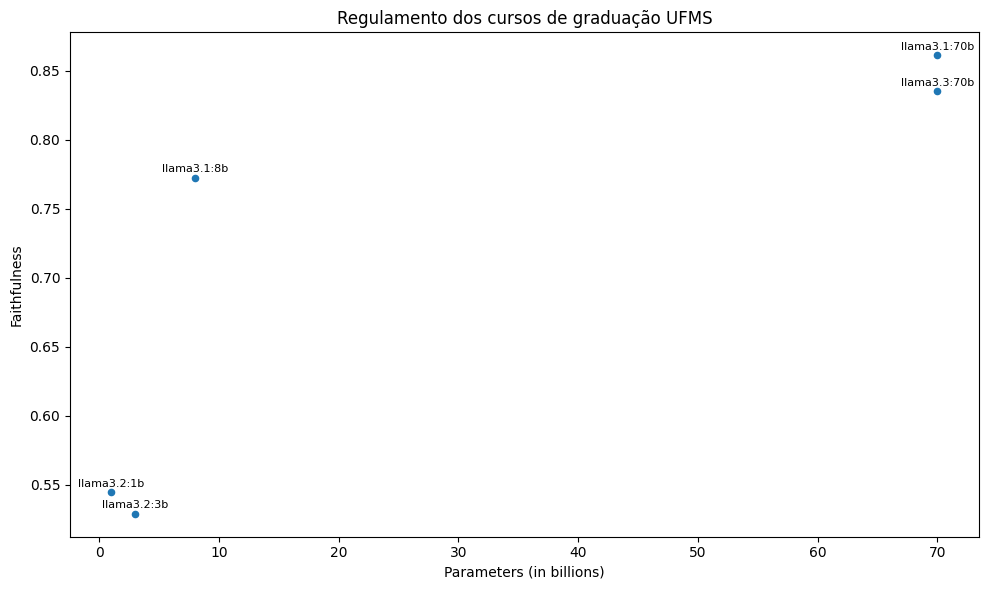

In [9]:
# just for "regulamento" file, create subplots showing the faithfulness score by model, variying the number of parameters
fig3, ax3 = plt.subplots(figsize=(10, 6))
tmp[tmp['file'] == 'regulamento'].sort_values(by='n_parameters').plot(x='n_parameters', y='faithfulness', kind='scatter', ax=ax3)
ax3.set_title('Regulamento dos cursos de graduação UFMS')
ax3.set_ylabel('Faithfulness')
ax3.set_xlabel('Parameters (in billions)')    

for i, txt in enumerate(tmp[tmp['file'] == 'regulamento']['model']):
    ax3.text(tmp[tmp['file'] == 'regulamento']['n_parameters'].iloc[i], tmp[tmp['file'] == 'regulamento']['faithfulness'].iloc[i] + 0.004, txt, fontsize=8, rotation=0, ha='center')

plt.tight_layout()
plt.show()

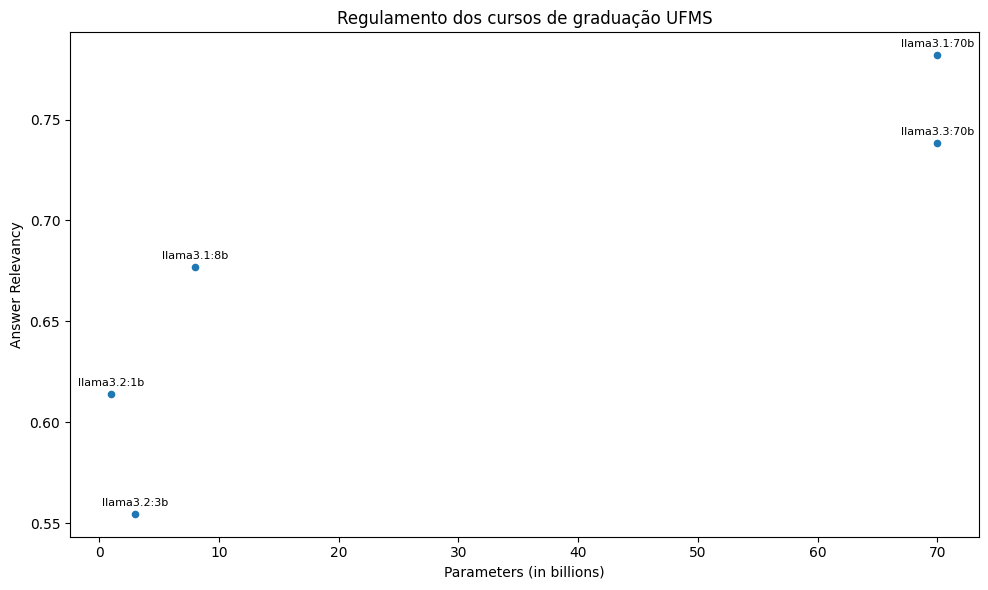

In [10]:
# just for "regulamento" file, create subplots showing the faithfulness score by model, variying the number of parameters
fig3, ax3 = plt.subplots(figsize=(10, 6))
tmp[tmp['file'] == 'regulamento'].sort_values(by='n_parameters').plot(x='n_parameters', y='answer_relevancy', kind='scatter', ax=ax3)
ax3.set_title('Regulamento dos cursos de graduação UFMS')
ax3.set_ylabel('Answer Relevancy')
ax3.set_xlabel('Parameters (in billions)')    

for i, txt in enumerate(tmp[tmp['file'] == 'regulamento']['model']):
    ax3.text(tmp[tmp['file'] == 'regulamento']['n_parameters'].iloc[i], tmp[tmp['file'] == 'regulamento']['answer_relevancy'].iloc[i] + 0.004, txt, fontsize=8, rotation=0, ha='center')

plt.tight_layout()
plt.show()

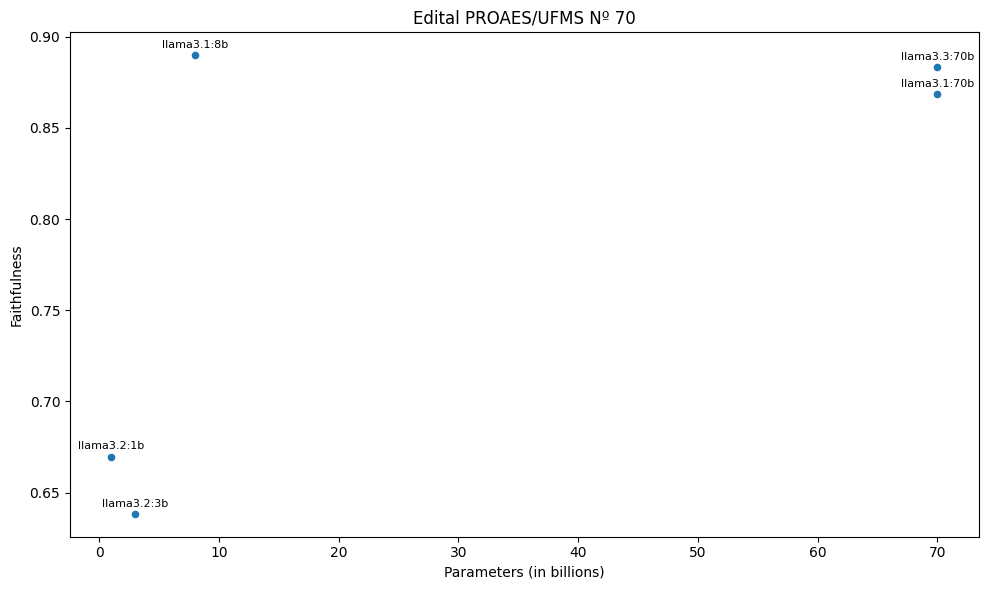

In [152]:
# just for "regulamento" file, create subplots showing the faithfulness score by model, variying the number of parameters
fig3, ax3 = plt.subplots(figsize=(10, 6))
tmp[tmp['file'] == 'edital-70'].sort_values(by='n_parameters').plot(x='n_parameters', y='faithfulness', kind='scatter', ax=ax3)
ax3.set_title('Edital PROAES/UFMS Nº 70')
ax3.set_ylabel('Faithfulness')
ax3.set_xlabel('Parameters (in billions)')    

for i, txt in enumerate(tmp[tmp['file'] == 'edital-70']['model']):
    ax3.text(tmp[tmp['file'] == 'edital-70']['n_parameters'].iloc[i], tmp[tmp['file'] == 'edital-70']['faithfulness'].iloc[i] + 0.004, txt, fontsize=8, rotation=0, ha='center')

plt.tight_layout()
plt.show()

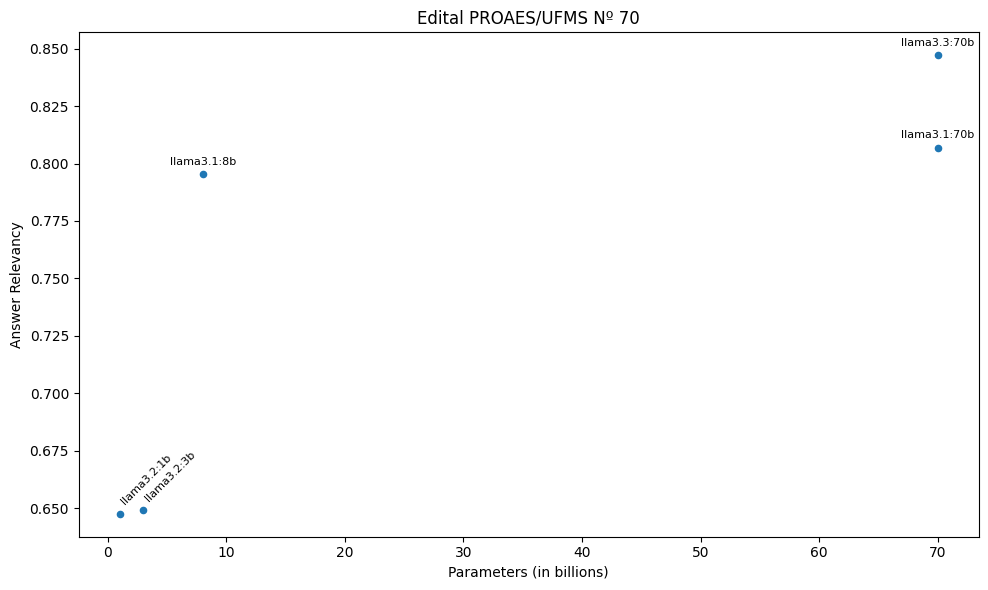

In [35]:
# just for "edital-70" file, create subplots showing the faithfulness score by model, variying the number of parameters
fig3, ax3 = plt.subplots(figsize=(10, 6))
tmp[tmp['file'] == 'edital-70'].sort_values(by='n_parameters').plot(x='n_parameters', y='answer_relevancy', kind='scatter', ax=ax3)
ax3.set_title('Edital PROAES/UFMS Nº 70')
ax3.set_ylabel('Answer Relevancy')
ax3.set_xlabel('Parameters (in billions)')    

for i, txt in enumerate(tmp[tmp['file'] == 'edital-70']['model']):
    
    if ('1b' in txt):
        ax3.text(tmp[tmp['file'] == 'edital-70']['n_parameters'].iloc[i], tmp[tmp['file'] == 'edital-70']['answer_relevancy'].iloc[i] + 0.004, txt, fontsize=8, rotation=45, ha='left')
    elif ('3b' in txt):
        ax3.text(tmp[tmp['file'] == 'edital-70']['n_parameters'].iloc[i], tmp[tmp['file'] == 'edital-70']['answer_relevancy'].iloc[i] + 0.004, txt, fontsize=8, rotation=45, ha='left')
    else:
        ax3.text(tmp[tmp['file'] == 'edital-70']['n_parameters'].iloc[i], tmp[tmp['file'] == 'edital-70']['answer_relevancy'].iloc[i] + 0.004, txt, fontsize=8, rotation=0, ha='center')

plt.tight_layout()
plt.show()

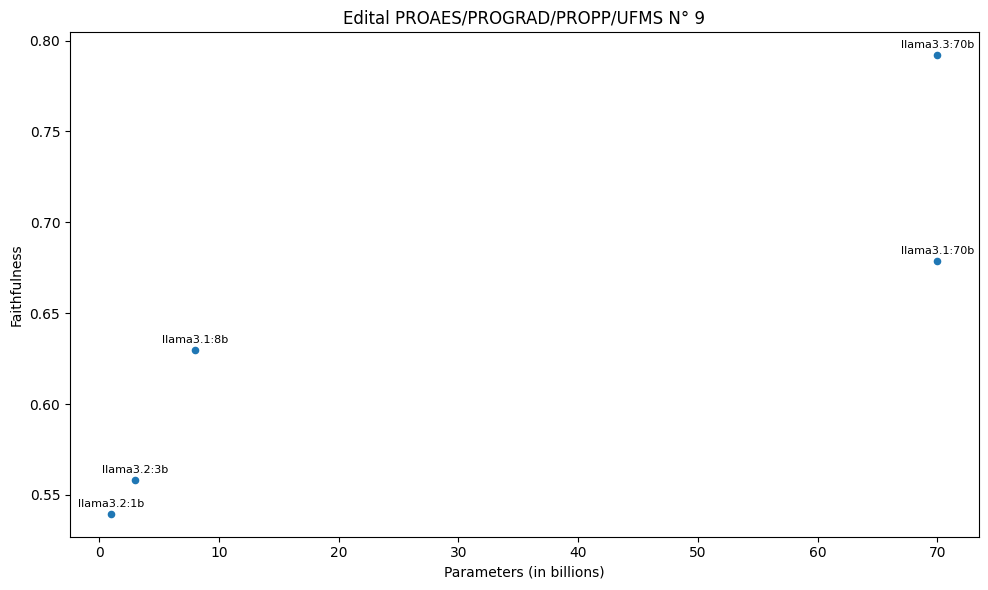

In [62]:
# just for "regulamento" file, create subplots showing the faithfulness score by model, variying the number of parameters
fig3, ax3 = plt.subplots(figsize=(10, 6))
tmp[tmp['file'] == 'edital-9'].sort_values(by='n_parameters').plot(x='n_parameters', y='faithfulness', kind='scatter', ax=ax3)
ax3.set_title('Edital PROAES/PROGRAD/PROPP/UFMS N° 9')
ax3.set_ylabel('Faithfulness')
ax3.set_xlabel('Parameters (in billions)')    

for i, txt in enumerate(tmp[tmp['file'] == 'edital-9']['model']):
    ax3.text(tmp[tmp['file'] == 'edital-9']['n_parameters'].iloc[i], tmp[tmp['file'] == 'edital-9']['faithfulness'].iloc[i] + 0.004, txt, fontsize=8, rotation=0, ha='center')

plt.tight_layout()
plt.show()

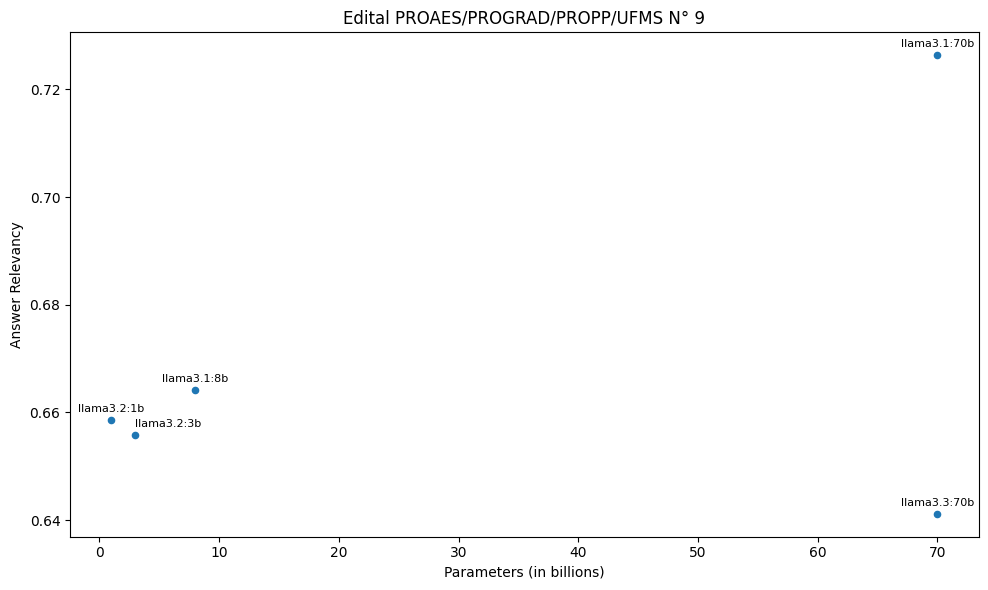

In [63]:
# just for "edital-9" file, create subplots showing the faithfulness score by model, variying the number of parameters
fig3, ax3 = plt.subplots(figsize=(10, 6))
tmp[tmp['file'] == 'edital-9'].sort_values(by='n_parameters').plot(x='n_parameters', y='answer_relevancy', kind='scatter', ax=ax3)
ax3.set_title('Edital PROAES/PROGRAD/PROPP/UFMS N° 9')
ax3.set_ylabel('Answer Relevancy')
ax3.set_xlabel('Parameters (in billions)')    

for i, txt in enumerate(tmp[tmp['file'] == 'edital-9']['model']):
    
    if ('1b' in txt):
        ax3.text(tmp[tmp['file'] == 'edital-9']['n_parameters'].iloc[i], tmp[tmp['file'] == 'edital-9']['answer_relevancy'].iloc[i] + 0.0015, txt, fontsize=8, rotation=0, ha='center')

    elif ('3b' in txt):
        ax3.text(tmp[tmp['file'] == 'edital-9']['n_parameters'].iloc[i], tmp[tmp['file'] == 'edital-9']['answer_relevancy'].iloc[i] + 0.0015, txt, fontsize=8, rotation=0, ha='left')
    else:
        ax3.text(tmp[tmp['file'] == 'edital-9']['n_parameters'].iloc[i], tmp[tmp['file'] == 'edital-9']['answer_relevancy'].iloc[i] + 0.0015, txt, fontsize=8, rotation=0, ha='center')

plt.tight_layout()
plt.show()